# 3. Train

**Tensorboard**
- Input at command: tensorboard --logdir=./log
- Input at browser: http://127.0.0.1:6006

In [11]:
import time
import os
import pandas as pd

project_name = 'Dog_Breed_Identification'
step_name = 'Train'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)

cwd = os.getcwd()
model_path = os.path.join(cwd, 'model')
print('model_path: ' + model_path)

run_name: Dog_Breed_Identification_Train_20171024_135457
model_path: E:\Kaggle\Dog_Breed_Identification\model


In [12]:
df = pd.read_csv(os.path.join(cwd, 'input', 'labels.csv'))
print('lables amount: %d' %len(df))
df.head()

lables amount: 10222


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [2]:
import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(2017)

x_train = []
y_train = {}
x_val = []
y_val = {}
x_test = []

cwd = os.getcwd()
feature_cgg16 = os.path.join(cwd, 'model', 'feature_VGG16_{}.h5'.format(171023))
feature_cgg19 = os.path.join(cwd, 'model', 'feature_VGG19_{}.h5'.format(171023))
feature_resnet50 = os.path.join(cwd, 'model', 'feature_ResNet50_{}.h5'.format(171023))
feature_xception = os.path.join(cwd, 'model', 'feature_Xception_{}.h5'.format(171023))
feature_inception = os.path.join(cwd, 'model', 'feature_InceptionV3_{}.h5'.format(171023))
for filename in [feature_cgg16, feature_cgg19, feature_resnet50, feature_xception, feature_inception]:
    with h5py.File(filename, 'r') as h:
        x_train.append(np.array(h['train']))
        y_train = np.array(h['train_label'])
        x_val.append(np.array(h['val']))
        y_val = np.array(h['val_label'])
        x_test.append(np.array(h['test']))

# print(x_train[0].shape)
x_train = np.concatenate(x_train, axis=-1)
# y_train = np.concatenate(y_train, axis=0)
x_val = np.concatenate(x_val, axis=-1)
# y_val = np.concatenate(y_val, axis=0)
x_test = np.concatenate(x_test, axis=-1)
print(x_train.shape)
print(x_train.shape[1:])

print(len(y_train))
print(x_val.shape)
print(len(y_val))
print(x_test.shape)

(9710, 7168)
(7168,)
9710
(512, 7168)
512
(10357, 7168)


In [3]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
print(y_train.shape)
print(y_val.shape)

Using TensorFlow backend.


(9710, 120)
(512, 120)


In [4]:
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(10000, input_shape=x_train.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(5000, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
from keras.callbacks import TensorBoard

log_path = os.path.join(model_path, run_name)
print('log_dir:' + log_path)
tensorBoard = TensorBoard(log_dir=log_path)

log_dir:E:\Kaggle\Dog_Breed_Identification\model\Dog_Breed_Identification_Train_20171024_133415


In [6]:
hist = model.fit(x_train, y_train,
                 batch_size=32,
                 epochs=20, #Increase this when not on Kaggle kernel
                 verbose=2,  #1 for ETA, 0 for silent
                 validation_data=(x_val, y_val), 
                 callbacks=[tensorBoard])

Train on 9710 samples, validate on 512 samples
Epoch 1/20
49s - loss: 4.6362 - acc: 0.0414 - val_loss: 3.7336 - val_acc: 0.2109
Epoch 2/20
48s - loss: 3.2836 - acc: 0.2231 - val_loss: 2.3613 - val_acc: 0.5117
Epoch 3/20
48s - loss: 2.2347 - acc: 0.4470 - val_loss: 1.5376 - val_acc: 0.6621
Epoch 4/20
48s - loss: 1.5268 - acc: 0.6265 - val_loss: 1.0502 - val_acc: 0.7676
Epoch 5/20
48s - loss: 1.0993 - acc: 0.7340 - val_loss: 0.8309 - val_acc: 0.7871
Epoch 6/20
48s - loss: 0.8269 - acc: 0.8025 - val_loss: 0.6527 - val_acc: 0.8301
Epoch 7/20
48s - loss: 0.6607 - acc: 0.8387 - val_loss: 0.5831 - val_acc: 0.8340
Epoch 8/20
48s - loss: 0.5401 - acc: 0.8695 - val_loss: 0.5323 - val_acc: 0.8379
Epoch 9/20
48s - loss: 0.4686 - acc: 0.8839 - val_loss: 0.5043 - val_acc: 0.8438
Epoch 10/20
48s - loss: 0.3935 - acc: 0.9048 - val_loss: 0.4899 - val_acc: 0.8457
Epoch 11/20
48s - loss: 0.3468 - acc: 0.9130 - val_loss: 0.4757 - val_acc: 0.8438
Epoch 12/20
48s - loss: 0.3012 - acc: 0.9263 - val_loss: 0.4

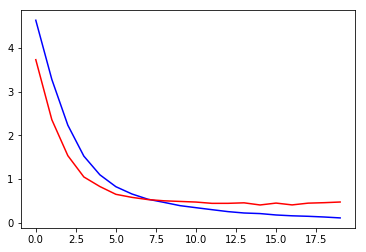

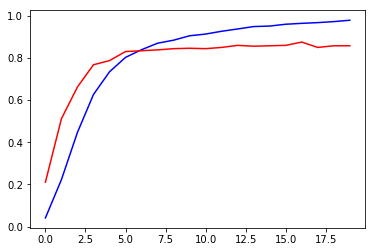

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [8]:
def saveModel(model, run_name):
    cwd = os.getcwd()
    modelPath = os.path.join(cwd, 'model')
    if not os.path.isdir(modelPath):
        os.mkdir(modelPath)
    weigthsFile = os.path.join(modelPath, run_name + '.h5')
    model.save(weigthsFile)
saveModel(model, run_name)

In [9]:
print('Done !')

Done !
